In [24]:
import numpy as np
# import h5py
import matplotlib.pyplot as plt
from loadmodules import *

datadir = '/home/pdcg/Documents/post_analysis/'
clusterparray = 'clusterp_array/'
coldphase = 'coldphase_peff/'

In [5]:
sf_1 = load_subfind(74, dir=datadir+clusterparray, loadonly=['fpos', 'slty', 'frc2', 'svel', 'sidm', 'smty', 'spos', 'fnsh', 'flty', 'slty', 'ffsh'] )
s_1 = gadget_readsnap(74, snappath=datadir+clusterparray, loadonlytype=[0,4], subfind=sf_1, applytransformationfacs=True)
sf_2 = load_subfind(127, dir=datadir+coldphase, loadonly=['fpos', 'slty', 'frc2', 'svel', 'sidm', 'smty', 'spos', 'fnsh', 'flty', 'slty', 'ffsh'] )
s_2 = gadget_readsnap(127, snappath=datadir+coldphase, loadonlytype=[0,4], subfind=sf_2, applytransformationfacs=True, hdf5=True)

/home/pdcg/pylib/gadget_subfind.py:443: H5pyDeprecationWarning: Using astype() as a context manager is deprecated. Slice the returned object instead, like: ds.astype(np.int32)[:10]
  with dset.astype('int64'):
/home/pdcg/pylib/gadget_snap.py:693: H5pyDeprecationWarning: Using astype() as a context manager is deprecated. Slice the returned object instead, like: ds.astype(np.int32)[:10]
  with dset.astype('uint64'):


In [3]:
s_1.calc_sf_indizes(sf_1)
center_1 = sf_1.data['spos'][0,:].astype('f8')
s_2.calc_sf_indizes(sf_2)
center_2 = sf_2.data['spos'][0,:].astype('f8')

In [4]:
rot_matrix_1 = s_1.select_halo(sf_1)
rot_matrix_2 = s_2.select_halo(sf_2)

galrad= 0.021268121898174286
Found 120007 stars.
galrad= 0.021268121898174286
Found 120007 stars.


In [5]:
mask_gas_1 = s_1.data['type']==0
mask_stars_1 = s_1.data['type']==4
mask_clusters_1 = s_1.data['nclt'] > 0
mask_gas_2 = s_2.data['type']==0
mask_stars_2 = s_2.data['type']==4
mask_clusters_2 = s_2.data['nclt'] > 0

(array([136., 254., 242., 192., 104.,  49.,  28.,   4.,   0.,   2.]),
 array([  651.09269087,  2449.95086263,  4248.80903438,  6047.66720613,
         7846.52537789,  9645.38354964, 11444.24172139, 13243.09989315,
        15041.9580649 , 16840.81623665, 18639.6744084 ]),
 [<matplotlib.patches.Polygon at 0x7f841a3d0c10>])

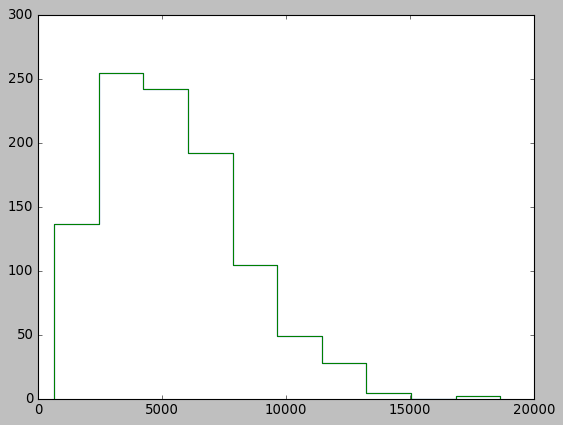

In [6]:
solar_mass_g = 1.989e33
plt.hist(s_1.data['mtrc'][mask_clusters_1] * s_1.UnitMass_in_g/solar_mass_g, histtype='step')
plt.hist(s_2.data['mtrc'][mask_clusters_2] * s_2.UnitMass_in_g/solar_mass_g, histtype='step')

In [7]:
(s_1.data['mclt'][mask_clusters_1] * s_1.UnitMass_in_g/solar_mass_g).max()

39744.36822318239

(array([  7.,  71., 168., 204., 212., 211., 129.,   6.,   2.,   1.]),
 array([0.04247858, 0.06642667, 0.09037477, 0.11432286, 0.13827096,
        0.16221905, 0.18616715, 0.21011525, 0.23406334, 0.25801143,
        0.28195953]),
 [<matplotlib.patches.Polygon at 0x7f8418fcefd0>])

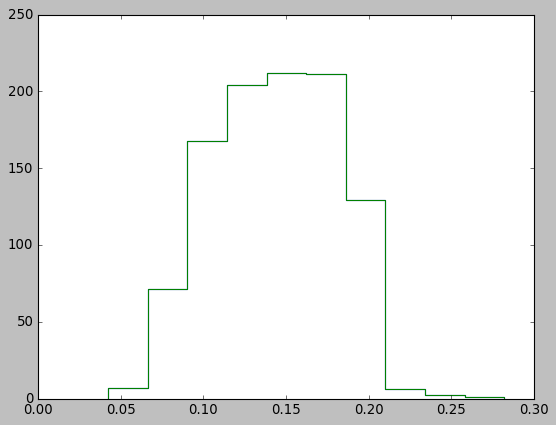

In [8]:
plt.hist(s_1.data['lcfe'][mask_clusters_1], histtype='step')
plt.hist(s_2.data['lcfe'][mask_clusters_2], histtype='step')

In [9]:
# s_2.plot_radprof('surfdens', log=True)
mask_height = np.abs(s_2.data['pos'][mask_gas_2][:,2])<0.3

In [21]:
s_2.data['surfdens'] = (s_2.data['mass'][mask_gas_2][mask_height]*s_2.UnitMass_in_g)/(s_2.data['area'][mask_height] * s_2.UnitLength_in_cm**2)
surfdens_radprof = s_2.get_radprof('surfdens', mask_in_data=mask_height)

dr set to 0.446426
Calculation took 0.005158s


In [22]:
phiP = 3
G = 6.6738e-8 #/ s_2.UnitLength_in_cm**3 * s_2.UnitMass_in_g * (s_2.UnitLength_in_cm / s_2.UnitVelocity_in_cm_per_s)**2

In [23]:
P_mp = phiP * np.pi/2 * G * s_2.data['surfdens']**2
s_2.data['P_mp'] = P_mp

In [24]:
Pmp_radprof = phiP * (np.pi/2) * G * surfdens_radprof[0,:]**2

In [13]:
# s_2.data['pres'] *= s_2.UnitMass_in_g/(s_2.UnitLength_in_cm * (s_2.UnitLength_in_cm / s_2.UnitVelocity_in_cm_per_s)**2)

In [27]:
s_2.data['press_disk'] = (s_2.data['pres'][mask_height] * s_2.UnitMass_in_g/(s_2.UnitLength_in_cm * (s_2.UnitLength_in_cm / s_2.UnitVelocity_in_cm_per_s)**2))
radprof_pres_1 = s_2.get_radprof('press_disk', mask_in_data=mask_height)
p_2 = s_2.get_radprof('P_mp', mask_in_data=mask_height)

dr set to 0.446426
Calculation took 0.005101s
dr set to 0.446426
Calculation took 0.005327s


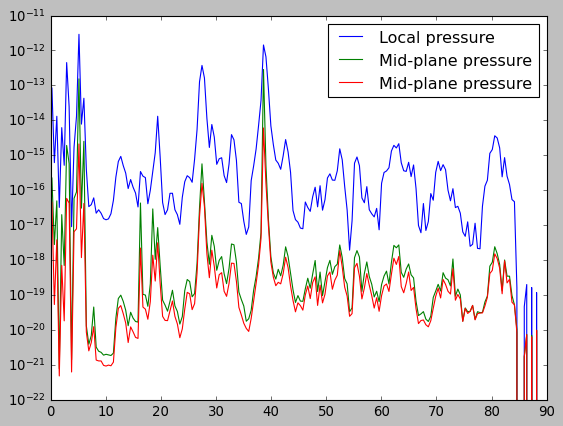

In [28]:
plt.semilogy(radprof_pres_1[1,:], radprof_pres_1[0,:], label='Local pressure')
plt.semilogy(p_2[1,:], p_2[0,:], label='Mid-plane pressure')
plt.semilogy(surfdens_radprof[1,:], Pmp_radprof, label='Mid-plane pressure')
plt.legend()

dr set to 0.562434
Calculation took 0.033475s
dr set to 0.562434
Calculation took 0.030452s


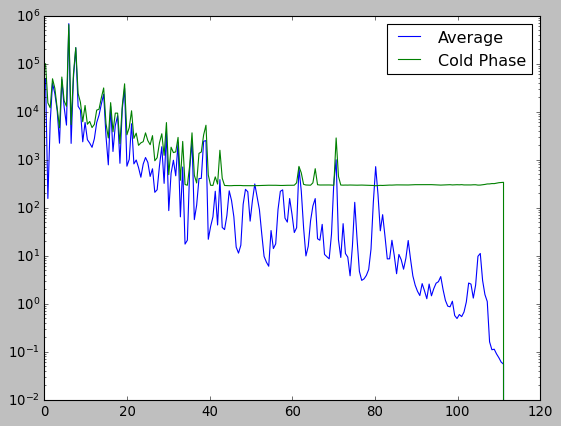

In [19]:
radprof_dens_1 = s_2.get_radprof('rho')
radprof_dens_2 = s_2.get_radprof('rhoc')
plt.semilogy(radprof_dens_1[1,:], radprof_dens_1[0,:], label='Average')
plt.semilogy(radprof_dens_2[1,:], radprof_dens_2[0,:], label='Cold Phase')
plt.legend()

In [37]:
# dr = (np.max(s.data['r']) - np.min(s.data['r']))/200
# rad = np.logspace(np.log10(dr), np.log10(np.max(s.data['r'])), 200)
# enclosed_mass = []
# for i in range(200):
#     mask = s.data['r']<rad[i]
#     enclosed_mass.append(np.sum(s.data['mass'][mask]))
# enclosed_mass = np.array(enclosed_mass)